# 1. Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/IMDb/IMDB_Dataset.csv")
print(dataset)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
dataset["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

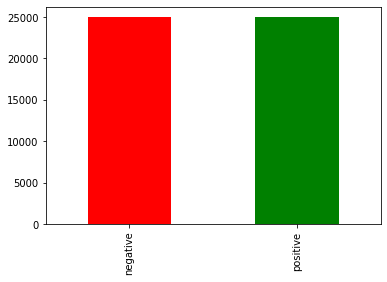

In [ ]:
import matplotlib.pyplot as plt
dataset['sentiment'].value_counts().sort_index().plot.bar(color=['red', 'green'])

## 1.1 Wordcloud sebelum preprocessing

In [ ]:
text = " ".join(review for review in dataset.review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 65521550 words in the combination of all review.


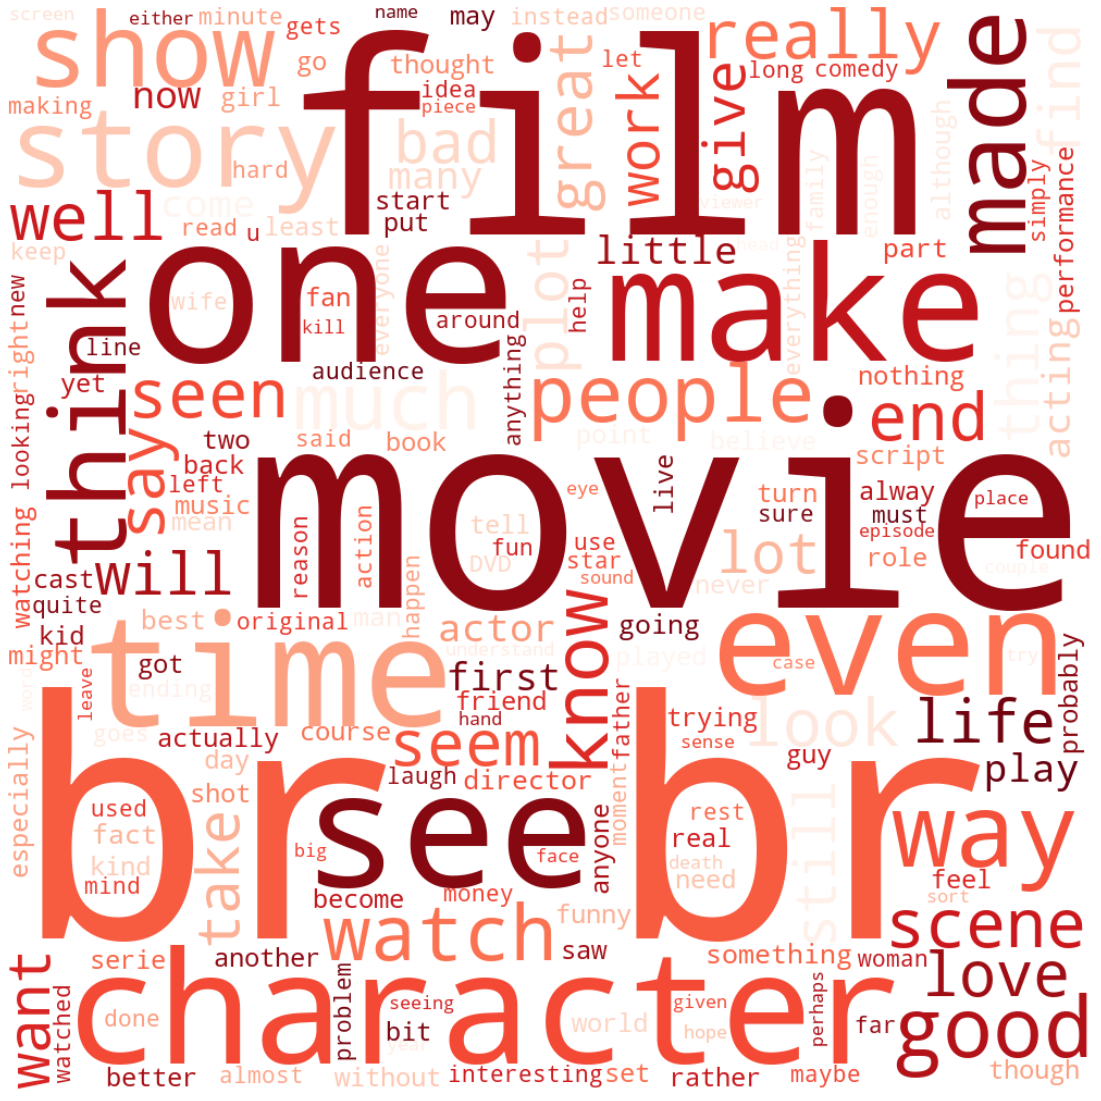

In [ ]:
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000,mode='RGBA',background_color='white').generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [ ]:
from bs4 import BeautifulSoup
import re

In [ ]:
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(dataset["review"].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance) #decontract function convert words like 've to have
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())
preprocessed_reviews[0]

100%|██████████| 50000/50000 [00:27<00:00, 1791.84it/s]


'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust not show faint hearted timid show pulls no punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy not high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows would not dare forget pretty pictures painted mainstream audiences forget charm forget romance oz not mess around first episode ever saw struck nasty surreal could not say ready watched developed taste oz got accustomed high levels graphic violence not violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turn

In [ ]:
dataset["review"] = preprocessed_reviews

## 1.2 Wordcloud setelah preprocessing

In [ ]:
text = " ".join(review for review in dataset.review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 41346691 words in the combination of all review.


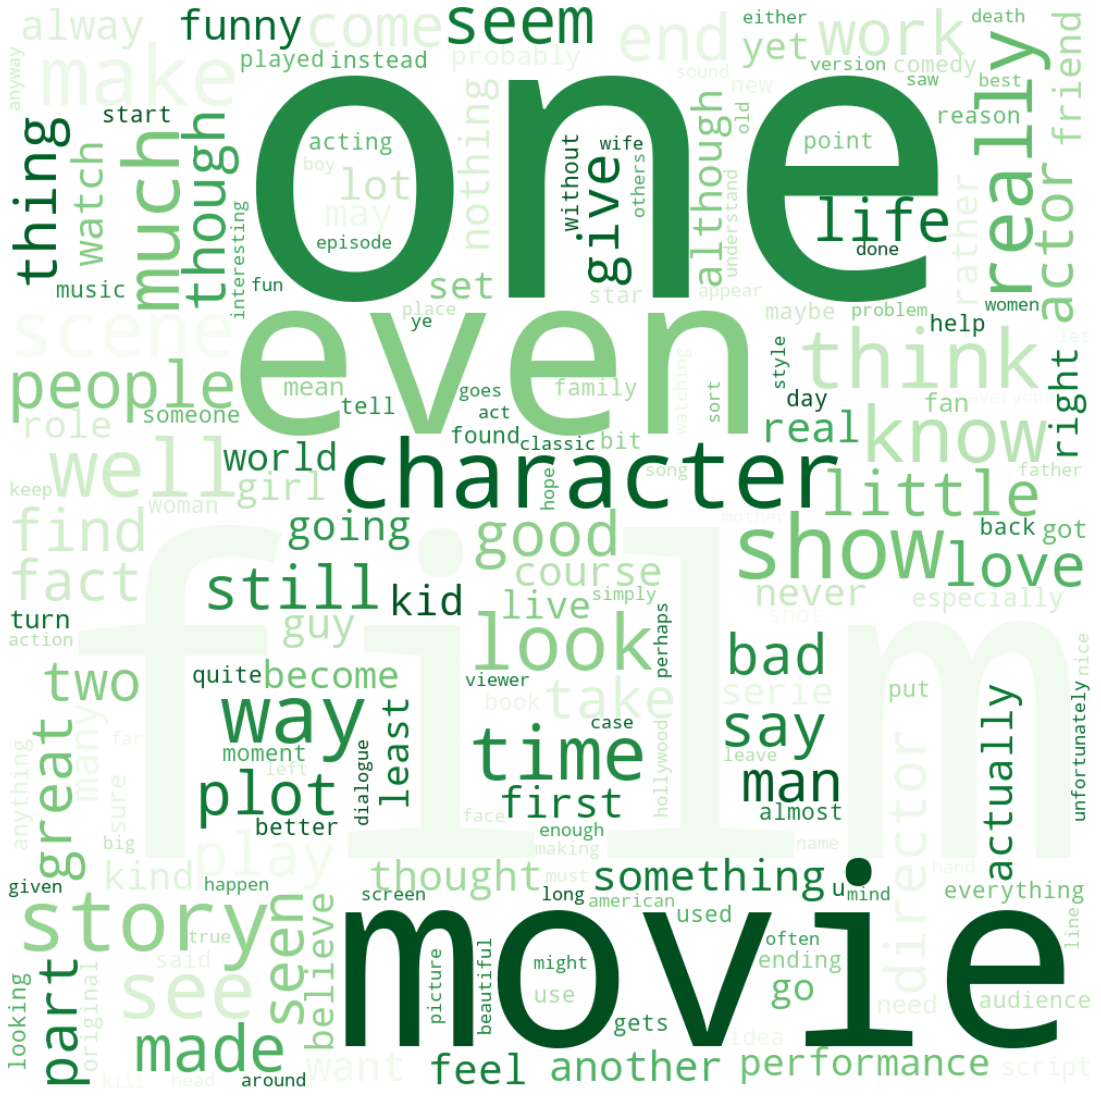

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["movie","show","film"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000,mode='RGBA',background_color='white').generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [ ]:
dataset.to_csv("/content/drive/MyDrive/Dataset/IMDb/preprocessed_dataset.csv")

#2. Proses SVM

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
#from sklearn.naive_bayes import BernoulliNB

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/IMDb/preprocessed_dataset.csv")
preprocessed_reviews = dataset["review"]

## 2.1 Text Vectorization

### 2.1.1 TIFDF Vectorizer

In [ ]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


some sample features(unique words in the corpus) ['aa', 'aaa', 'aag', 'aaliyah', 'aames', 'aamir', 'aamir khan', 'aardman', 'aaron', 'aaron carter']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (50000, 80839)
the number of unique words including both unigrams and bigrams  80839


### 2.1.2 BOW Vectorizer

In [ ]:
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_reviews)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

Bow_vectors = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(Bow_vectors))
print("the shape of out text BOW vectorizer ",Bow_vectors.get_shape())
print("the number of unique words ",Bow_vectors.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaaaaaaaaaaahhhhhhhhhhhhhh', 'aaaaaaaargh', 'aaaaaaah', 'aaaaaaahhhhhhggg', 'aaaaagh', 'aaaaah', 'aaaaahhhh', 'aaaaargh']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (50000, 101872)
the number of unique words  101872


## 2.2 SVM

### 2.2.1 TIFDF

In [ ]:
from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [ ]:
X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(final_tf_idf, dataset['sentiment'], test_size=0.25, random_state=5)

In [ ]:
SVM_tfidf = SVC(random_state=0)
SVM_tfidf.fit(X_train_tfidf, Y_train_tfidf)

SVC(random_state=0)

In [ ]:
# Parameter Tuning
predicted = SVM_tfidf.predict(X_test_tfidf)
accuracy_score = metrics.accuracy_score(predicted,Y_test_tfidf)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

90.84%


In [ ]:
# Hyperparameter Tuning
SVM_TFIDF = SVC(C=10)
SVM_TFIDF.fit(X_train_tfidf,Y_train_tfidf)
predicted = SVM_TFIDF.predict(X_test_tfidf)
accuracy_score = metrics.accuracy_score(predicted, Y_test_tfidf)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

In [ ]:
confusion_matrix(predicted, Y_test_tfidf)

In [ ]:
confusion_matrix(predicted, Y_train_tfidf)

In [ ]:
print(classification_report(predicted, Y_test_tfidf))

In [ ]:
plot_confusion_matrix(predicted, Y_test_tfidf)  
plt.show()

In [ ]:
plot_confusion_matrix(predicted, Y_train_tfidf)  
plt.show()

### 2.2.2 BOW

In [ ]:
X_train_br, X_test_br, Y_train_br, Y_test_br = train_test_split(Bow_vectors, data['sentiment'], test_size=0.25, random_state=5)

In [ ]:
SVM_br = SVC(random_state=0)
SVM_br.fit(X_train_br, Y_train_br)

In [ ]:
#Parameter tuning
predicted = SVM_br.predict(X_test_br)
accuracy_score = metrics.accuracy_score(predicted,Y_test_br)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

In [ ]:
#Hyperparameter tuning
SVM_BOW = SVC(C=10)
SVM_BOW.fit(X_train_br,Y_train_br)
predicted = SVM_BOW.predict(X_test_br)
accuracy_score = metrics.accuracy_score(predicted, Y_test_br)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

In [ ]:
from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
nb = SVC()
param_grid = {'C': [0.1, 1, 10]} 
clf = GridSearchCV(nb, param_grid, cv=3, scoring='accuracy',return_train_score=True)
clf.fit(X_train_br,Y_train_br)
results = pd.DataFrame.from_dict(clf.cv_results_)
results.sort_values(by="rank_test_score").head(4)

In [ ]:
confusion_matrix(predicted, Y_test_br)

In [ ]:
confusion_matrix(predicted, Y_train_br)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
print(classification_report(predicted, Y_test_br))

In [ ]:
plot_confusion_matrix(SVM_BOW, X_test_tfidf, Y_test_tfidf)  
plt.show()

In [ ]:
plot_confusion_matrix(SVM_BOW, X_train_tfidf, Y_train_tfidf)  
plt.show()